# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Описание данных
`children` — количество детей в семье
<br>
`days_employed` — общий трудовой стаж в днях
<br>
`dob_years` — возраст клиента в годах
<br>
`education` — уровень образования клиента
<br>
`education_id` — идентификатор уровня образования
<br>
`family_status` — семейное положение
<br>
`family_status_id` — идентификатор семейного положения
<br>
`gender` — пол клиента
<br>
`income_type` — тип занятости
<br>
`debt` — имел ли задолженность по возврату кредитов
<br>
`total_income` — ежемесячный доход
<br>
`purpose` — цель получения кредита


## Откроем таблицу и изучим общую информацию о данных

**1. Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.**

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**2. Выведем первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**4. Выведем количество пропущенных значений для каждого столбца.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**5. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**7. Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

**8. Выведем перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**9. В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**10. Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**11. Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**12. Убедимся, что все пропуски заполнены.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**13. Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**14. Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**15. Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**16. На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**17. Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**18. Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуем данные и отвечаем на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# Подготовим инструменты для дальнейшего использования
!pip install phik
import phik
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Повторно выведем датафрейм для наглядности
df = data
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


Для начала оценим 𝜙k корреляцию для понимания общей картины взаимосвязей.

In [24]:
interval_cols = ['children', 'dob_years', 'total_income']
phik_overview = df[
        ['children', 'dob_years', 'education',
         'family_status', 'gender', 'income_type', 'debt',
         'total_income', 'purpose', 'total_income_category', 'purpose_category']
    ].phik_matrix(interval_cols=interval_cols)
phik_overview = phik_overview['debt'].sort_values(ascending=False).iloc[1:].reset_index()
cm = sns.color_palette("coolwarm", as_cmap=True)
phik_overview.style.background_gradient(cmap=cm,subset=['debt'])
#sns.dark_palette("red", as_cmap=True)

,index,debt
0,income_type,0.083525
1,dob_years,0.068599
2,purpose_category,0.050060
3,education,0.047145
4,children,0.037015
5,gender,0.033420
6,purpose,0.032239
7,family_status,0.027289
8,total_income,0.017078
9,total_income_category,0.016502


На первый взгляд, похоже, что на возврат кредита в срок большего всего влияет `тип занятости`, с другой стороны появляется вопрос почему в то же время корреляция с параметром `уровнь дохода` самая низкая из всех. Вторым по значимости является возраст клиента.
<br>
`Категория цели кредита` - третья.
<br>
`Колличество детей` на пятом месте
<br>
`Семейное положение` судя по всему, влияет относительно незначительно.
<br>
Впрочем, даже 𝜙k корреляции не стоит слепо доверять, так что давайте проверять каждую интересующую нас взаимосвязь подробнее.
<br>
И начнем мы с количества детей.


Для удобства в дальнейшем под "целевым параметром" будет подразумеваться `возврат кредита в срок`. Чем выше этот параметр, тем выше шанс просрочки по кредиту.

In [25]:
#Построим сводник по колличеству детей и целевому параметру
children_group = df.groupby('children')['debt'].agg(['mean', 'count', 'sum']).sort_values(by='count')
children_group.columns = ['среднее значение целевого параметра', 'колличество клиентов', 'колличество случаев просрочки']
children_group

,среднее значение целевого параметра,колличество клиентов,колличество случаев просрочки
children,,,
5,0.000000,9,0
4,0.097561,41,4
3,0.081818,330,27
2,0.094542,2052,194
1,0.092346,4808,444
0,0.075438,14091,1063


Из таблицы выше видно, что у клиентов с 5 детьми нет ни одной просрочки, но если обратить внимание на колличество клиентов - оказывается их всего 9, в выборку легко могло не попастьни одной просрочки, но утверждать на основе этих данных, что клиенты с 5 детьми самые надежные плательщики нельзя.
<br>
Посмотрим на таблицу без первой строки.

In [26]:
children_group = children_group.iloc[1:]
cm = sns.color_palette("light:#FF0000", as_cmap=True)
children_group.style.background_gradient(cmap=cm,subset=['среднее значение целевого параметра'])

,среднее значение целевого параметра,колличество клиентов,колличество случаев просрочки
children,,,
4,0.097561,41,4
3,0.081818,330,27
2,0.094542,2052,194
1,0.092346,4808,444
0,0.075438,14091,1063


Удалив данный выброс мы видим, что самый высокий целевой у показатель у клиентов с 4 детьми. Но и тут нельзя с уверностью сказать о четкой закономерности, так как данных по клиентам с 3-мя и 4-мя детьми все еще очень мало, по сравнению с остальными категориями. Таким образом колебания от 10% просрочек (4 ребенка) до 8% (3 ребенка) могут оказаться случайными.
<br>
Зато с увереностью можно говорить о том, что у клиентов без детей целевой показатель ниже, чем у клиентов с любым колличеством детей.  

**Вывод:** 

✅ **Зависимость между количеством детей и возвратом кредита в срок подтверждена.**
- **У клиентов без детей целевой параметр ниже, чем у клиентов с детьми.**

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
#Построим сводник по семейному положению и целевому параметру
family_status_group = df.groupby('family_status')['debt'].agg(['mean', 'count', 'sum']).sort_values(by='count')
family_status_group.columns = ['среднее значение целевого параметра', 'колличество клиентов', 'колличество случаев просрочки']
cm = sns.color_palette("light:#FF0000", as_cmap=True)
family_status_group.style.background_gradient(cmap=cm,subset=['среднее значение целевого параметра'])

,среднее значение целевого параметра,колличество клиентов,колличество случаев просрочки
family_status,,,
вдовец / вдова,0.066246,951,63
в разводе,0.070648,1189,84
Не женат / не замужем,0.097639,2796,273
гражданский брак,0.093130,4134,385
женат / замужем,0.075606,12261,927


Тот самый случай, когда корреляция может не показывать всех деталей.
<br>
Как мы видим из таблицы выше, у клиентов со статусом `Не женат / не замужем` и `гражданский брак` целевой параметр выше.
<br>
Важно отметить, что в категории `женат / замужем` клиентов больше, чем во всех остальных вместе взятых. Это может искажать результаты.
<br>
В категории `вдовец / вдова` целевой параметр самый низкий, но тут наоборот, колличество клиентов меньше, чем во всех остальных.

**Вывод:** 

✅ **Зависимость между семейным положением и возвратом кредита в срок подтверждена.**

Более детальные выводы:
- У клиентов со статусом `Не женат / не замужем` и `гражданский брак` целевой параметр самый высокий.
- В категории `вдовец / вдова` целевой параметр самый низкий


На точность данных утверждений могут влиять следующие факторы:
- В категории `женат / замужем` клиентов значительно больше, чем в остальных.
- В категории `вдовец / вдова` клиентов меньше, чем в остальных.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
# Построим сводник по категории уровня дохода и целевому параметру
income_group = df.groupby('total_income_category')['debt'].agg(['mean', 'count', 'sum']).sort_values(by='total_income_category')
income_group.columns = ['среднее значение целевого параметра', 'колличество клиентов', 'колличество случаев просрочки']
cm = sns.color_palette("light:#FF0000", as_cmap=True)
income_group.style.background_gradient(cmap=cm,subset=['среднее значение целевого параметра'])

,среднее значение целевого параметра,колличество клиентов,колличество случаев просрочки
total_income_category,,,
A,0.080000,25,2
B,0.070602,5014,354
C,0.084982,15921,1353
D,0.060172,349,21
E,0.090909,22,2


На таблице заметно чередование среднего значения целевого параметра - у группы `A`, `C` и `E` он выше, а у `D` и `B` ниже. Проблема в том, что в нашу выборку попало очень разное колличество клиентов - в группе `E` их всего 22, тогда как в группе `C` почти 16 тысяч. Для того, чтобы получить более репрезентативную выборку можно разбить клиентов по уровню дохода на бóльшее колличество групп с равномерным распределением в них - то есть так, чтобы в каждую группу попало почти одинаковое колличество клиентов.

In [29]:
# Для этого воспользуемся qcut
df['total_income_qcut'] = pd.qcut(df['total_income'], 20)
income_group_qcut = df.groupby('total_income_qcut')['debt'].agg(['mean'])
income_group_qcut['variance'] = income_group_qcut.index.categories.length
income_group_qcut['left'] = income_group_qcut.index.categories.left
income_group_qcut['left'] = income_group_qcut['left'].round().astype(int)
income_group_qcut['right'] = income_group_qcut.index.categories.right
income_group_qcut['right'] = income_group_qcut['right'].round().astype(int)
income_group_qcut['group'] = income_group_qcut['left'].astype(str) + '-' + income_group_qcut['right'].astype(str)
income_group_qcut = income_group_qcut.drop(['left', 'right'], axis=1)
income_group_qcut.columns = ['среднее значение целевого параметра', 'разброс доходов в группе', 'группа']
cm = sns.color_palette("light:#FF0000", as_cmap=True)
income_group_qcut.style.background_gradient(cmap=cm,subset=['среднее значение целевого параметра'])

,среднее значение целевого параметра,разброс доходов в группе,группа
total_income_qcut,,,
"(20666.999, 64561.5]",0.066542,43894.501000,20667-64562
"(64561.5, 78710.0]",0.080600,14148.500000,64562-78710
"(78710.0, 88700.0]",0.084428,9990.000000,78710-88700
"(88700.0, 98514.0]",0.090909,9814.000000,88700-98514
"(98514.0, 107507.0]",0.077861,8993.000000,98514-107507
"(107507.0, 115973.0]",0.089035,8466.000000,107507-115973
"(115973.0, 122507.5]",0.086304,6534.500000,115973-122508
"(122507.5, 132113.0]",0.082474,9605.500000,122508-132113
"(132113.0, 141735.5]",0.089118,9622.500000,132113-141736


''

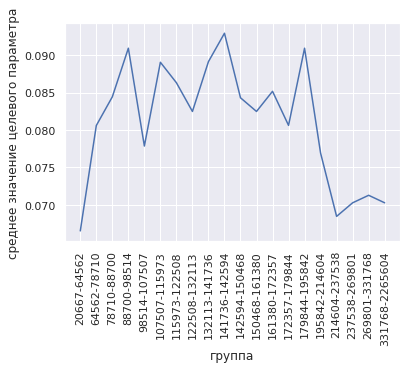

In [30]:
# Для удобства построим график, где по оси x будут группы доходов оп возрастанию, 
# а по оси y среднее значение целевого параметра
sns.set_theme(style="darkgrid")
sns.lineplot(x=income_group_qcut['группа'], y=income_group_qcut['среднее значение целевого параметра'])
plt.xticks(rotation=90)
''

Как и предсказывала 𝜙k корреляция в основной массе целевой показатель слабо зависит от уровня дохода и в диапазоне от 65тыс до 195тыс в котором находится около 70% клиентов целевой показатель хаотично колеблется между 7.8% и 9.3%.
<br>
Что интересно, у клиентов с доходом ниже 65тыс или выше 195тыс целевой показатель ниже, чем у диапазона 65тыс-195тыс.

**Вывод:** 

- **Линейная зависимость между уровнем дохода и возвратом кредита в срок отсутствует.**
- **Взаимосвязь все же есть - клиенты с доходом ниже 65тыс и клиенты с доходом выше 195тыс в среднем совершают меньше просрочек, чем чем клиенты с доходом от 65тыс до 195тыс.**

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [31]:
# В силу большого колличества различных целей удобнее будет работать с категориями целей кредита
# Построим сводник по категориям целей кредита и целевому параметру
purpose_category_group = df.groupby('purpose_category')['debt'].agg(['mean', 'count', 'sum']).sort_values(by='count')
purpose_category_group.columns = ['среднее значение целевого параметра', 'колличество клиентов', 'колличество случаев просрочки']
cm = sns.color_palette("light:#FF0000", as_cmap=True)
purpose_category_group.style.background_gradient(cmap=cm,subset=['среднее значение целевого параметра'])

,среднее значение целевого параметра,колличество клиентов,колличество случаев просрочки
purpose_category,,,
проведение свадьбы,0.079118,2313,183
получение образования,0.092528,3988,369
операции с автомобилем,0.093480,4279,400
операции с недвижимостью,0.072551,10751,780


**Вывод:** 

✅ **Зависимость между целями кредита и возвратом кредита в срок подтверждена.**

Более детальные выводы:
- У клиентов, бравших кредит на `операции с автомобилем` и `получение образования` целевой параметр самый высокий.
- У клиентов, бравших кредит на `проведение свадьбы` целевой параметр значительно ниже.
- У клиентов, бравших кредит на `операции с недвижимостью` целевой параметр самый низкий.


На точность данных утверждений могут влиять следующие факторы:
- В категории `операции с недвижимостью` клиентов значительно больше, чем в остальных.

#### 3.5 Возможные причины появления пропусков в исходных данных.

*Ответ:* 


К сожалению, по имеющимся данным невозможно установить характер пропусков. Причины могут быть как технические, так и человеческим фактором. К примеру, данные могли собираться из разных БД с разной структурой и в одной из них не было информации о пропущенных значениях. В качестве же примера человеческого фактора можно привести процесс одобрения заявки на кредит - бóльшую часть информации о клиенте легко получить из паспортных данных, обязательных при взятии кредита, цели и просрочка - информация, которая наверняка есть у банка, тогда как тип занятости, трудовой стаж, заработная плата и образование - информация, которую может предоставить только клиент. Возможно, трудовой стаж и заработная плата являются не обязательной информацией для выдачи некотрых типов кредитов.

#### 3.6 Почему заполнить пропуски медианным значением — зачастую лучшее решение для количественных переменных.

*Ответ:* 


При отсутствии информации о непрерывных переменных может появиться необходимость избавится от пропусков. В этом случае есть разные подходы:
- Заменить пропущенное значение средним значением
- Заменить пропущенное значение медианой. 
Если в данных присутствуют выбросы, способ замены пропусков медианы является предпочтительным, так как меньше икажает результаты.


В данном случае можно также попробовать найти взаимосвязи с другой информацией о клиенте, чтобы уменьшить среднюю ошибку. Минус данного подхода в том, что при маленькой выборке он может давать непредсказуемые результаты.
<br>
Для демонстрации данного подхода попробуем решить эту задачу регрессии градиентным бустингом с использованием наиболее простой библиотеки catboost.

In [32]:
# Заново подрузим необработанные данные
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [33]:
# Подготовим данные
data = data[data['children'].isin([ 1, 0, 3, 2, 4, 5])]
# В этот раз удалим все строки пропусками в столбце 'total_income'
data = data[data['total_income'].notna()]
data['total_income'] = data['total_income'].astype('int')
data['education'] = data['education'].str.lower()
data = data.drop_duplicates().reset_index(drop=True)
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
# Избавимся от ненужных стоблцов и стобцов с аномальными значениями
data = data[['children', 'dob_years', 'education',
             'family_status', 'gender', 'income_type', 'debt',
             'total_income', 'purpose']]

In [34]:
# Для удобства выведем тип данных каждого столбца 
data.dtypes

children          int64
dob_years         int64
education        object
family_status    object
gender           object
income_type      object
debt              int64
total_income      int64
purpose          object
dtype: object

In [35]:
# Импортируем нужные библиотеки
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor

# Разделяем данные на выборку для обучения, валидационную выборку и тестовую выборку
train, test = train_test_split(data, train_size=0.6, random_state=42)
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [36]:
# Формируем список переменных для построения модели, целевую переменную и категориальные переменные
X = ['children', 'dob_years', 'education',
     'family_status', 'gender', 'income_type', 'debt',
     'total_income', 'purpose']

cat_features = ['education', 'family_status', 'gender', 'income_type', 'purpose']

y = ['total_income']

# Формируем параметры модели
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.5,
              'random_seed':42,
              'verbose':100}

In [37]:
# модель с параметрами
model = CatBoostRegressor(**parameters)

In [38]:
# Обучаем модель
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.2989655	test: 0.3064193	best: 0.3064193 (0)	total: 61ms	remaining: 1m
100:	learn: 0.0088210	test: 0.0100019	best: 0.0100019 (100)	total: 1.07s	remaining: 9.51s
200:	learn: 0.0055089	test: 0.0072660	best: 0.0072660 (200)	total: 2.04s	remaining: 8.09s
300:	learn: 0.0045159	test: 0.0065599	best: 0.0065522 (296)	total: 3.03s	remaining: 7.04s
400:	learn: 0.0038006	test: 0.0061026	best: 0.0060986 (399)	total: 3.96s	remaining: 5.92s
500:	learn: 0.0033930	test: 0.0058531	best: 0.0058485 (496)	total: 4.89s	remaining: 4.87s
600:	learn: 0.0030847	test: 0.0056895	best: 0.0056859 (599)	total: 5.78s	remaining: 3.84s
700:	learn: 0.0028326	test: 0.0055823	best: 0.0055778 (694)	total: 6.75s	remaining: 2.88s
800:	learn: 0.0026582	test: 0.0055563	best: 0.0055563 (799)	total: 7.65s	remaining: 1.9s
900:	learn: 0.0024936	test: 0.0055213	best: 0.0055211 (899)	total: 8.56s	remaining: 941ms
999:	learn: 0.0023773	test: 0.0055198	best: 0.0055119 (970)	total: 9.39s	remaining: 0us

bestTest = 0.0055118

In [39]:
# Объявляем функцию подсчет MAE и MAPE
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [40]:
# Медиана в каждой группе income_type
test['total_income_median'] = data.groupby('income_type')['total_income'].transform('median')
# Предсказание модели
test['total_income_pred'] = model.predict(test[X])

In [41]:
# Считаем ошибку подхода с медианой
error(test['total_income'], test['total_income_median'])

64938.90020790021
0.4293165502769825


In [42]:
# Считаем ошибку подхода с градиентным бустингом
error(test['total_income'], test['total_income_pred'])

2272.6276055859207
0.0060451782711285025


(array([0, 1]), [Text(0, 0, 'медиана'), Text(1, 0, 'градиентный бустинг')])

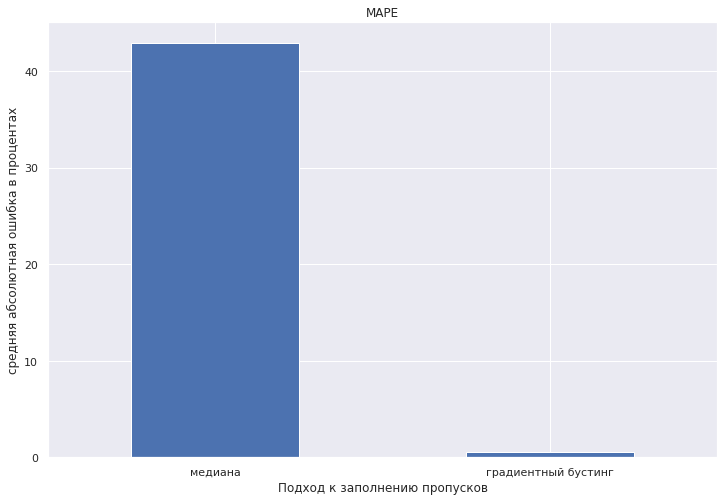

In [43]:
# Построим график, чтобы наглядно убедится в масштабе разницы
MAPE = pd.Series([42.9, 0.6], index=['медиана', 'градиентный бустинг'])
plt.figure(figsize=(12, 8))
fig = MAPE.plot(kind='bar')
fig.set_title('MAPE')
fig.set_xlabel('Подход к заполнению пропусков')
fig.set_ylabel('средняя абсолютная ошибка в процентах')
plt.xticks(rotation=0)

Таким образом, используя градиентный бустинг мы смогли снизить среднюю ошибку более чем в 70 раз!
<br>
Конечно, такой подход значительно сложнее и применять его стоит только в том случае, если точность значений данного столбца важна для дальнейшего анализа.

### Шаг 4: общий вывод.

Было проведено исследование, чтобы выявить влияние разных факторов на вероятность погашения кредита в срок. Входные данные – статистика о платежеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга – специальной системы, которая оценивает способность потенциального заемщика вернуть кредит банку.

Перед проведением исследования были поставлены несколько гипотез:

- Гипотеза 1: Количество детей клиента влияет на вероятность погашения кредита в срок.
- Гипотеза 2: Семейное положение клиента влияет на вероятность погашения кредита в срок.
- Гипотеза 3: Уровень дохода клиента влияет на вероятность погашения кредита в срок.
- Гипотеза 4: Цель кредита влияет на вероятность погашения кредита в срок.

В результате удалось выявить зависимости.

✅ **Гипотеза 1 подтверждена:**

9.3

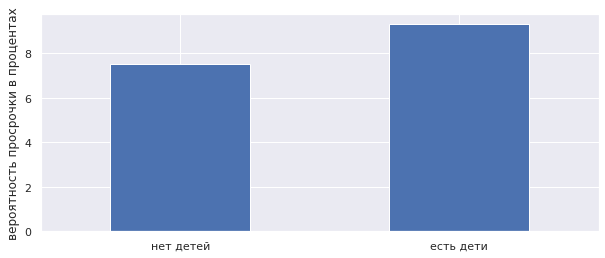

In [44]:
mean_have_children = round((0.094542 + 0.092346) / 2 * 100, 1)
children_plot = pd.Series([7.5, mean_have_children], index=['нет детей', 'есть дети'])
plt.figure(figsize=(10, 4))
fig = children_plot.plot(kind='bar')
fig.set_ylabel('вероятность просрочки в процентах')
plt.xticks(rotation=0)
mean_have_children

- Вероятность просрочки у клиентов `без детей` - `7.5%`
- Вероятность просрочки у клиентов `с детьми` - `9.3%`

Вывод:

Наличие детей у клиента повышает вероятность просрочки.

Рекомендации:

Провести повторное исследование на бóльшей выборке для установления наличия зависимоти между количеством детей клиента и вероятностью просрочки.

⚠️ **Гипотеза 2 частично подтверждена:**

(0.077, 0.087)

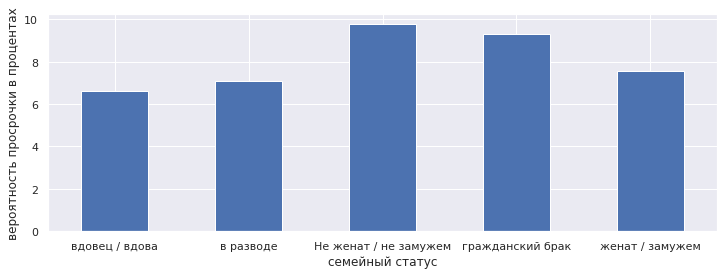

In [45]:
family_status_plot = family_status_group['среднее значение целевого параметра'] * 100
plt.figure(figsize=(12, 4))
fig = family_status_plot.plot(kind='bar')
fig.set_ylabel('вероятность просрочки в процентах')
fig.set_xlabel('семейный статус')
plt.xticks(rotation=0)
marriage = family_status_group['среднее значение целевого параметра'][[0,1,3]].mean().round(3)
no_marriage = family_status_group['среднее значение целевого параметра'][[2,4]].mean().round(3)
marriage, no_marriage

- Вероятность просрочки у клиентов, состоящих/состоявших в браке - `7.7%`
- Вероятность просрочки у клиентов не состоящих/не состоявших в браке - `8.7%`

Вывод:

У клиентов состоящих/состоявших в браке вероятность просрочки ниже, чем у клиентов не состоящих/не состоявших в браке.

Рекомендации:

Разница в вероятностях всего 1%, что очень мало относительно других характеристик, поэтому рассматривать данную характеристику при построении скоринговой системы надо очень осторожно. Такие значения могут оказаться статистической погрешностью и для того, чтобы применять эту зависимость на практике надо сделать повторные исследования на значительно бóльшей выборке.

⚠️ **Гипотеза 3 частично подтверждена:**

(6.654, 8.6, 7.1)

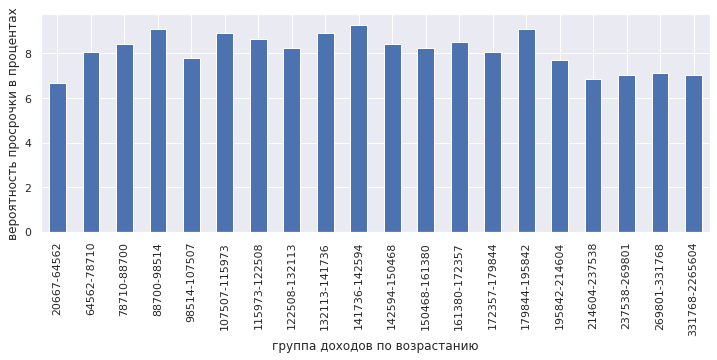

In [46]:
qcut_plot = income_group_qcut['среднее значение целевого параметра'] * 100
qcut_plot.index = income_group_qcut['группа']
plt.figure(figsize=(12, 4))
fig = qcut_plot.plot(kind='bar')
fig.set_ylabel('вероятность просрочки в процентах')
fig.set_xlabel('группа доходов по возрастанию')
plt.xticks(rotation=90)
avg = qcut_plot[1:-5].mean().round(1)
low = qcut_plot[0].round(3)
high = qcut_plot[[0, -5, -4, -3, -2, -1]].mean().round(1)
low, avg, high

Линейная зависимость между уровнем дохода и возвратом кредита в срок отсутствует.

Однако взаимосвязь все же есть:

- Вероятность просрочки у клиентов с доходом ниже `65.000` - `6.7%`
- Вероятность просрочки у клиентов с доходом от `65.000` до `195.000` - `8.6%`
- Вероятность просрочки у клиентов с доходом выше `195.000` - `7.1%`

Вывод:

Клиенты с доходом ниже `65.000` и клиенты с доходом выше `195.000` в среднем совершают меньше просрочек, чем чем клиенты с доходом от `65.000` до `195.000`.

Рекомендации:

Данный результат нужно применять на практике с осторожностью, так как для бóльшей части клиентов уровень дохода не связан с вероятностью просрочки. И если снижение частоты просрочек у клиентов с высокими доходами закономерен, то низкая частота просрочек у клиентов с низким доходом может быть обусловлен многими сторонними факторами. Так как доход - основной показатель, от которого зависит кредитный рейтинг клиента наряду с имуществом и закредитованностью, возможно, банк выдавал кредиты такой категории клиентов только под более крупный и надежный залог, либо при наличии у клиента безупречной КИ.

✅ **Гипотеза 4 подтверждена:**

purpose_category
проведение свадьбы          7.9
получение образования       9.3
операции с автомобилем      9.3
операции с недвижимостью    7.3
Name: среднее значение целевого параметра, dtype: float64

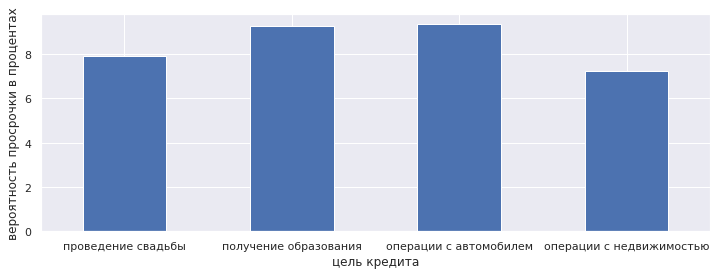

In [47]:
purpose_category_plot = purpose_category_group['среднее значение целевого параметра'] * 100
plt.figure(figsize=(12, 4))
fig = purpose_category_plot.plot(kind='bar')
fig.set_ylabel('вероятность просрочки в процентах')
fig.set_xlabel('цель кредита')
plt.xticks(rotation=0)
purpose_category_plot.round(1)

- Вероятность просрочки у клиентов, бравших кредит на `получение образования` - `9.3%`
- Вероятность просрочки у клиентов, бравших кредит на `операции с автомобилем` - `9.3%`
- Вероятность просрочки у клиентов, бравших кредит на `проведение свадьбы` - `7.9%`
- Вероятность просрочки у клиентов, бравших кредит на `операции с недвижимостью` - `7.3%`

Вывод:

Цели кредита значительно влияют на вероятность просрочки:
- У клиентов, бравших кредит на `операции с автомобилем` и `получение образования` вероятность просрочки самая высокая.
- У клиентов, бравших кредит на `проведение свадьбы` вероятность просрочки значительно ниже.
- У клиентов, бравших кредит на `операции с недвижимостью` вероятность просрочки самая низкая.

Рекомендации:

Взаимосвязь цели кредита и вероятности просрочки достаточно отчетлива, поэтому данную характеристику уже можно применять при построении скоринговой модели. В тоже время различия между минимальной и максимальной вероятностями - 2%. Это говорит о том, что вес данной характеристики в принятии решения не должен быть слишком большой. Можно провести повторное исследование на значительно бóльшей выборке для анализа зависимостей более узких целей кредитования для повышения точности скоринговой модели.

**Общие рекомендации:**
1. При построении кредитной скоринговой модели уже можно использовать зависимости из гипотез 1 и 4 (`количество детей` и `цели кредита`) и частично из гипотезы 3 (`уровень дохода`)
2. Необходимо собрать более полную выборку для проверки гипотезы 2 (`семейное положение`) и уточнения/расширения гипотезы 1 и 4 (`количество детей` и `цели кредита`)
3. Необходимо дополнительно проанализировать причины низкой вероятности просрочки у клиентов с низким доходом на основе более разнообразных данных, например, с использованием данных о заявках на кредиты и об их одобрении/отклонении, для возможности использования этой зависимости в кредитной скоринговой модели.